In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [55]:
SIZE = 2000

In [56]:
procedure = np.empty(SIZE+1)
posix = np.empty(SIZE+1)
openmp = np.empty(SIZE+1)
win32 = np.empty(SIZE+1)

sizes = np.arange(1000000, 1000000 + SIZE+1)

In [57]:
with open(r"linux/logger.txt", mode="r") as file:
    while True:
        line = file.readline()
        if not line:
            break
        index = int(re.search("Array size = (.*), result of", line).group(1)) - 1000000
        ticks = float(line.split(" ")[-1])
        if "procedure" in line:
            procedure[index] = ticks
        if "posix" in line:
            posix[index] = ticks
        if "openmp" in line:
            openmp[index] = ticks

with open(r"windows/logger_win32.txt", mode="r") as file:
    while True:
        line = file.readline()
        if not line:
            break
        index = int(re.search("Array size = (.*), result of", line).group(1)) - 1000000
        ticks = line.split(" ")[-1]
        if "win32" in line:
            win32[index] = ticks

In [58]:
print(win32[0:5])

[0.009      0.00255659 0.01       0.005      0.00261973]


In [59]:
#сглаживание
w = 200
def moving_average(sizes, interval, win=4):
    filt = np.ones(win)/win
    mov = win//2
    return sizes[mov:-mov], np.convolve(interval, filt, mode='same')[mov:-mov]

sizes_new, procedure = moving_average(sizes, procedure, w)
_, posix = moving_average(sizes, posix, w)
_, openmp = moving_average(sizes, openmp, w)
_, win32 = moving_average(sizes, win32, w)

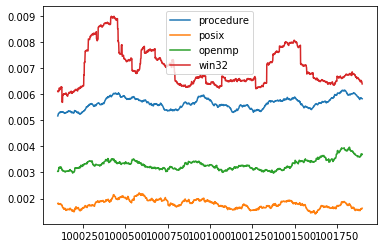

In [60]:
# plot lines with windows
plt.plot(sizes_new, procedure, label = "procedure", linestyle="-")
plt.plot(sizes_new, posix, label = "posix", linestyle="-")
plt.plot(sizes_new, openmp, label = "openmp", linestyle="-")
plt.plot(sizes_new, win32, label = "win32", linestyle="-")
plt.legend()
plt.show()